In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml
import csv
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



In [63]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hieppham1341/apartment-rentals-merged-with-socio-economics-info")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 4.18M/4.18M [00:00<00:00, 5.73MB/s]

Extracting files...


Path to dataset files: C:\Users\globa\.cache\kagglehub\datasets\hieppham1341\apartment-rentals-merged-with-socio-economics-info\versions\1


In [64]:
# the source for the file download is 
df=pd.read_csv("C:/Users/globa/.cache/kagglehub/datasets/hieppham1341/apartment-rentals-merged-with-socio-economics-info/versions/1/rentcrime.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108120 entries, 0 to 108119
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           108120 non-null  int64  
 1   amenities            108120 non-null  object 
 2   bathrooms            108120 non-null  float64
 3   bedrooms             108120 non-null  float64
 4   has_photo            108120 non-null  object 
 5   pets_allowed         108120 non-null  int64  
 6   price                108120 non-null  float64
 7   square_feet          108120 non-null  int64  
 8   cityname             108120 non-null  object 
 9   state                108120 non-null  object 
 10  latitude             108120 non-null  float64
 11  longitude            108120 non-null  float64
 12  source               108120 non-null  object 
 13  time                 108120 non-null  int64  
 14  train                108120 non-null  int64  
 15  year             

<Axes: >

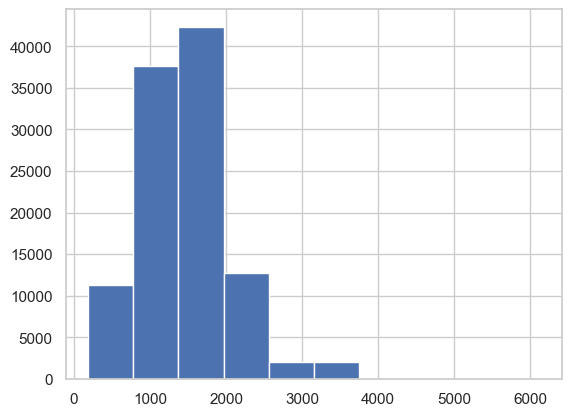

In [65]:
df['avg_crime'].hist()

In [55]:
df1=df[(df['state']=='CA')]
df1=df1.drop(['avg_crime', 'amenities', 'has_photo', 'cityname', 'state', 'source'], axis=1)
X = StandardScaler().fit_transform(df1)
y = df['avg_crime']

print(X.shape)


(11204, 29)


In [56]:
# Getting the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)


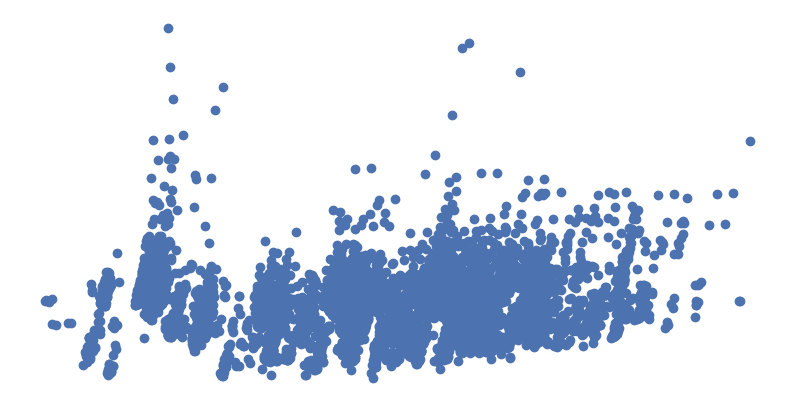

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [59]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11204 samples in 0.008s...
[t-SNE] Computed neighbors for 11204 samples in 1.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11204
[t-SNE] Computed conditional probabilities for sample 2000 / 11204
[t-SNE] Computed conditional probabilities for sample 3000 / 11204
[t-SNE] Computed conditional probabilities for sample 4000 / 11204
[t-SNE] Computed conditional probabilities for sample 5000 / 11204
[t-SNE] Computed conditional probabilities for sample 6000 / 11204
[t-SNE] Computed conditional probabilities for sample 7000 / 11204
[t-SNE] Computed conditional probabilities for sample 8000 / 11204
[t-SNE] Computed conditional probabilities for sample 9000 / 11204
[t-SNE] Computed conditional probabilities for sample 10000 / 11204
[t-SNE] Computed conditional probabilities for sample 11000 / 11204
[t-SNE] Computed conditional probabilities for sample 11204 / 11204
[t-SNE] Mean sigma: 0.433330
[t-SNE] KL divergenc

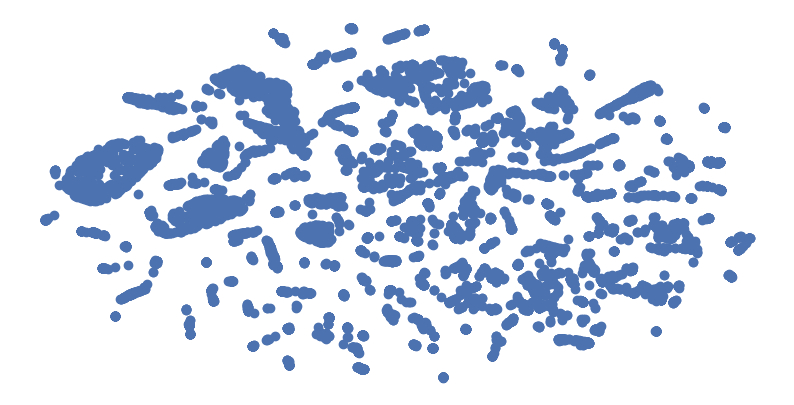

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [48]:
!pip install umap-learn 
import umap

In [61]:
import time
import umap
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
time_start = time.time()


UMAP done! Time elapsed: 60.29581427574158 seconds


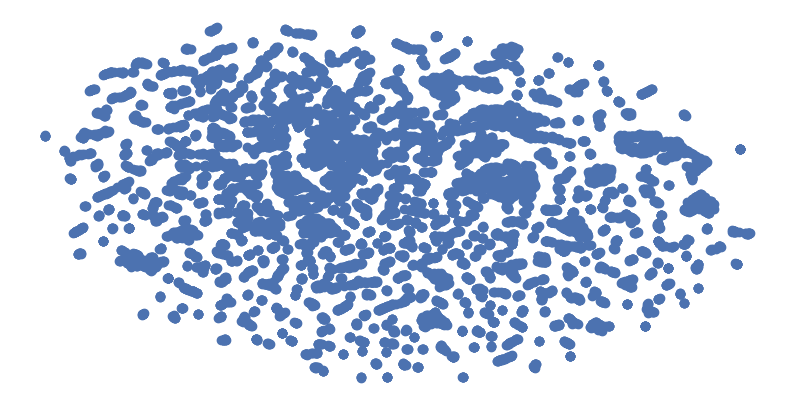

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# no visible clusters

In [16]:
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics
df.dropna(inplace=True)

#initially the analysis was performed nationwide. Adjusted Rand Score from PCA was less than 0.1 and silhouette score of 0.13. 
#Checking to see if specifying the state would result in higher adjusted rand score and silhouette scores. 
df1=df[(df['state']=='CA')]

X=df1.drop(['avg_crime', 'amenities', 'state', 'cityname','source', 'has_photo'], axis=1)
y=df1['avg_crime']
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time that you go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. You use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the DataFrame.



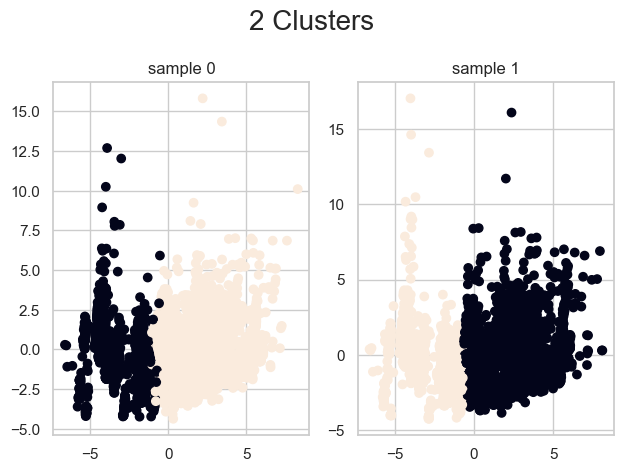

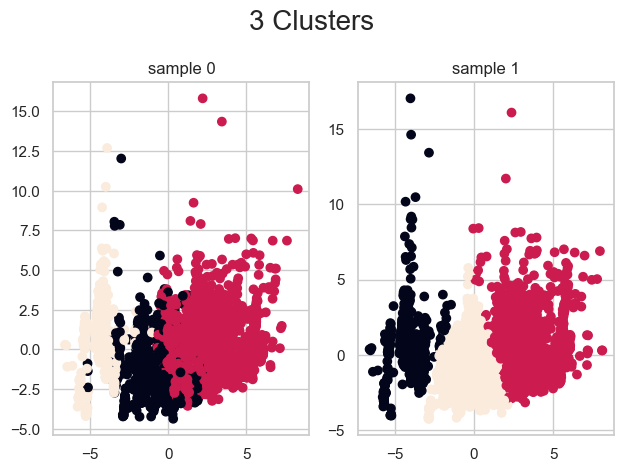

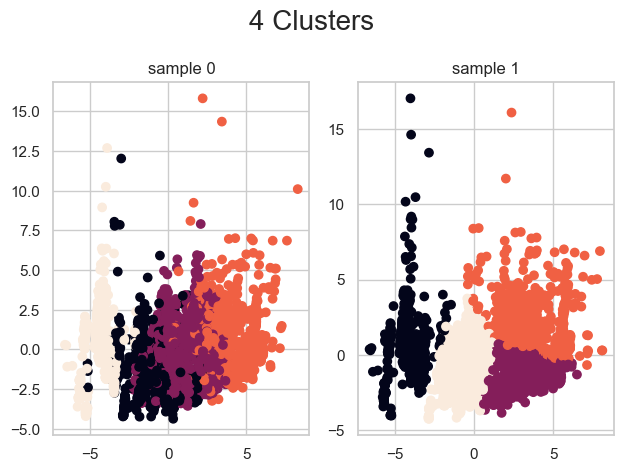

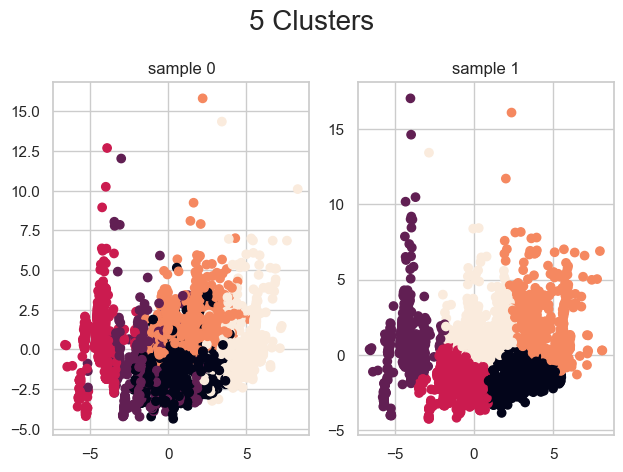

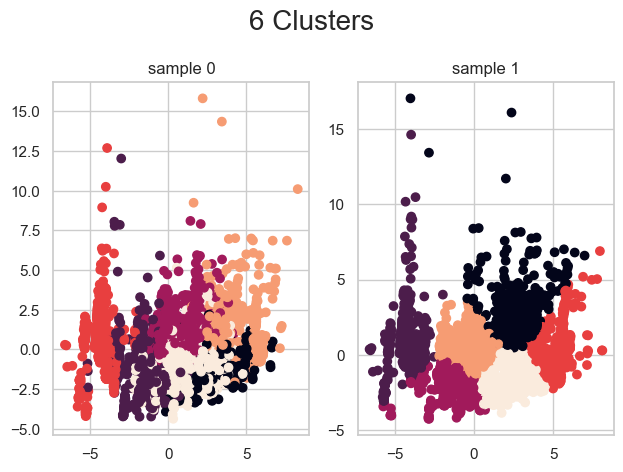

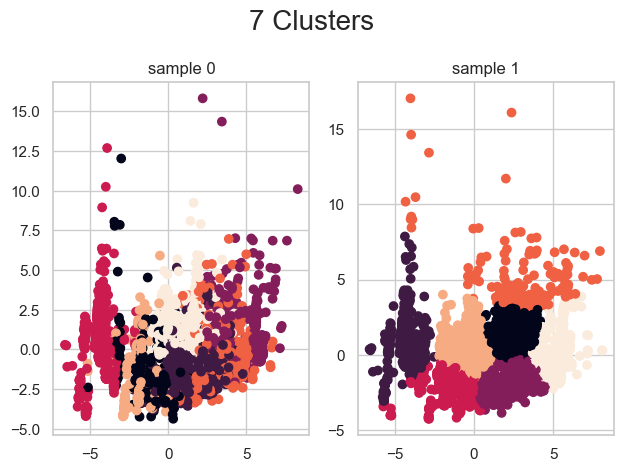

In [17]:
from sklearn.cluster import KMeans

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 8):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred


# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 8):
    
    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample
    for i in range(2):
        
        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')


In [39]:
full_pred = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
print(metrics.adjusted_rand_score(y, full_pred))
# with n clusters=3, adj rand score is 0.29, n clusters=4 - 0.33, n-clusters=5 - 0.4, 6-0.45, 7-0.43, 8 - 0.49, 


0.39351134051811953


In [51]:
#Adjusted rand score and silhuette scores improved when only using one state 'CA' data
#potentially, dummy variable from 'state' can be created and added to nationwide analysis
# n clusters: 3-0.2, 4-0.22, 5-0.23, 6-0.23, 7-0.24, 8-0.25
# with number of clusters increasing from 3-10, silhouette score increased from - 0.2 to 0.26. 
from sklearn import datasets, metrics
labels = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))


0.2514810800339838


In [52]:
# Defining the agglomerative clustering. Not necessary to provide n-clusters.
# with "complete' linkage adj rand score is 0.22, silhouette score - 0.18. Lower than PCA. Number of clusters - 3 
# with "ward" linkage adj rand score is 0.17, silhouette score is 0.25. number of clusters -3
# increasing number of clusters to 5 (according to the dendogram) resulted in adj rand score of 0.4 and silhouette score of 0.21
# I would pick number of clusters - 5 for either PCA or hierarchical  clustering (adj rand scores and silhouette scores are similar)

from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))



Adjusted Rand Index of the Agglomerative Clustering solution: 0.4051984174447983
The silhouette score of the Agglomerative Clustering solution: 0.20989750888261677


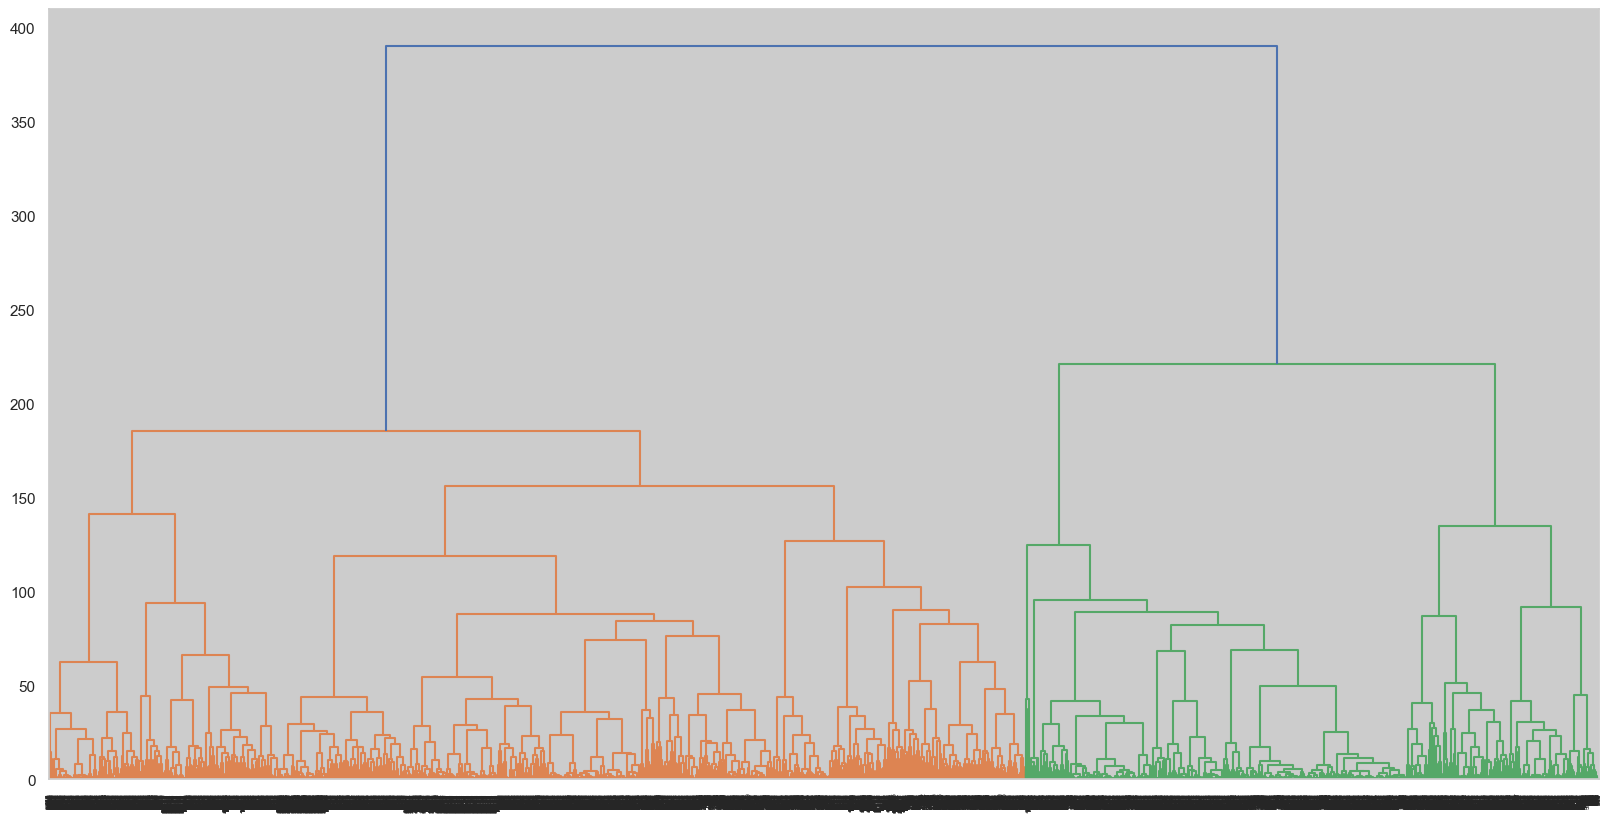

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()
